# Case Study (Base Case)

In [1]:
import swolfpy as sp
import swolfpy_inputdata as spid
import swolfpy_processmodels as sppm

import brightway2 as bw2
import pandas as pd
from time import time
import os
import platform
from IPython.display import Image
pd.set_option('display.max_colwidth', 0)

### SwolfPy version used to produced the results:

In [2]:
pd.DataFrame({'Version': [sp.__version__, sppm.__version__, spid.__version__]},
             index=['swolfpy', 'swolfpy_processmodels', 'swolfpy_inputdata'])

,Version
swolfpy,0.2.4
swolfpy_processmodels,0.1.8
swolfpy_inputdata,0.2.3


### System info

In [3]:
pd.DataFrame({'info': [platform.platform(),
                       platform.processor(),
                       os.cpu_count()]},
             index=['Platform', 'Processor', 'CPU_count'])

,info
Platform,Windows-10-10.0.19041-SP0
Processor,"Intel64 Family 6 Model 158 Stepping 9, GenuineIntel"
CPU_count,8


## Create project

In [4]:
project_name = 'BaseCase'
technosphere = sp.Technosphere(project_name)
common_data = spid.CommonData()
ProcessMetaData = sppm.ProcessModelsMetaData.ProcessModelsMetaData

In [5]:
# Treatment processes
Treatment_processes = {}
Treatment_processes['LF'] = {'input_type':ProcessMetaData['LF']['InputType'] , 'model':sppm.LF()}
Treatment_processes['Composting'] = {'input_type':ProcessMetaData['Comp']['InputType'] , 'model':sppm.Comp()}
Treatment_processes['SS_MRF'] = {'input_type':ProcessMetaData['SS_MRF']['InputType'] , 'model':sppm.SS_MRF()}
Treatment_processes['Reprocessing'] = {'input_type':ProcessMetaData['Reproc']['InputType'] , 'model':sppm.Reproc()}


In [6]:
# Distance
Processes = ['LF', 'Composting', 'SS_MRF', 'Reprocessing', 'Collection']
data = sppm.Distance.create_distance_table(process_names=Processes,
                                           transport_modes=['Heavy Duty Truck'],
                                           default_dist=30)

distance = sppm.Distance(data)          
data['Heavy Duty Truck']

,LF,Composting,SS_MRF,Reprocessing,Collection
LF,NaN,30.0,30.0,30.0,30.0
Composting,NaN,NaN,30.0,30.0,30.0
SS_MRF,NaN,NaN,NaN,30.0,30.0
Reprocessing,NaN,NaN,NaN,NaN,30.0
Collection,NaN,NaN,NaN,NaN,NaN


In [7]:
# Collection_processes:
# Only include one single family sector wih residual waste collection
Collection_scheme = sppm.SF_Col.scheme()
Collection_scheme[('RWC', 'SSYW', 'SSR')] = 1
Collection_processes = {}
Collection_processes['Collection'] = {'input_type': [],
                                      'model': sppm.SF_Col('Collection', Collection_scheme,
                                                      Treatment_processes=Treatment_processes,
                                                      Distance=distance)}

In [8]:
start = time()
demo = sp.Project(project_name, common_data, Treatment_processes, distance, Collection_processes, technosphere)
demo.init_project()
demo.write_project()
demo.group_exchanges()
print("Time for writing the project: {} second".format(round(time()-start)))

Biosphere database already present!!! No setup is needed
Vacuuming database 
Vacuuming database 


Writing activities to SQLite3 database:



                ####
                ++++++  Writing the Technosphere
                


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:14


Title: Writing activities to SQLite3 database:
  Started: 11/27/2021 11:53:42
  Finished: 11/27/2021 11:53:57
  Total time elapsed: 00:00:14
  CPU %: 47.00
  Memory %: 1.34


Writing activities to SQLite3 database:



              ####
              ++++++ Initializing the LF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 11/27/2021 11:53:57
  Finished: 11/27/2021 11:53:57
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 1.35

              ####
              ++++++ Initializing the Composting
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/27/2021 11:53:58
  Finished: 11/27/2021 11:53:58
  Total time elapsed: 00:00:00
  CPU %: 151.20
  Memory %: 1.35

              ####
              ++++++ Initializing the SS_MRF
              

Writing activities to SQLite3 database:


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 11/27/2021 11:53:58
  Finished: 11/27/2021 11:53:58
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 1.35

              ####
              ++++++ Initializing the Reprocessing
              


0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/27/2021 11:53:58
  Finished: 11/27/2021 11:53:58
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 1.35

              ####
              ++++++ Initializing the Collection
              


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/27/2021 11:53:58
  Finished: 11/27/2021 11:53:58
  Total time elapsed: 00:00:00
  CPU %: 104.20
  Memory %: 1.35


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the LF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


Title: Writing activities to SQLite3 database:
  Started: 11/27/2021 11:53:58
  Finished: 11/27/2021 11:53:59
  Total time elapsed: 00:00:01
  CPU %: 51.80
  Memory %: 1.36

                  ####
                  ++++++ Writing the Composting_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 11/27/2021 11:54:00
  Finished: 11/27/2021 11:54:00
  Total time elapsed: 00:00:00
  CPU %: 97.70
  Memory %: 1.37

              ####
              ++++++ Writing the Composting
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/27/2021 11:54:00
  Finished: 11/27/2021 11:54:00
  Total time elapsed: 00:00:00
  CPU %: 75.20
  Memory %: 1.37

                  ####
                  ++++++ Writing the SS_MRF_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/27/2021 11:54:00
  Finished: 11/27/2021 11:54:01
  Total time elapsed: 00:00:00
  CPU %: 68.10
  Memory %: 1.38


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the SS_MRF
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Writing activities to SQLite3 database:


Title: Writing activities to SQLite3 database:
  Started: 11/27/2021 11:54:01
  Finished: 11/27/2021 11:54:01
  Total time elapsed: 00:00:00
  CPU %: 72.70
  Memory %: 1.39

              ####
              ++++++ Writing the Reprocessing
              


0% [###############] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/27/2021 11:54:02
  Finished: 11/27/2021 11:54:02
  Total time elapsed: 00:00:00
  CPU %: 40.10
  Memory %: 1.39

                  ####
                  ++++++ Writing the Collection_product
                  


Writing activities to SQLite3 database:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/27/2021 11:54:02
  Finished: 11/27/2021 11:54:02
  Total time elapsed: 00:00:00
  CPU %: 78.50
  Memory %: 1.40


Writing activities to SQLite3 database:



              ####
              ++++++ Writing the Collection
              


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 11/27/2021 11:54:03
  Finished: 11/27/2021 11:54:03
  Total time elapsed: 00:00:00
  CPU %: 83.10
  Memory %: 1.41

                  Grouping the exchanges with parameters in Database LF
                  

                  Grouping the exchanges with parameters in Database Composting
                  

                  Grouping the exchanges with parameters in Database SS_MRF
                  

                  Grouping the exchanges with parameters in Database Reprocessing
                  

                  Grouping the exchanges with parameters in Database Collection
                  
Time for writing the project: 48 second


In [9]:
start = time()
newparam = []
demo.update_parameters(newparam)

print("Time for updating the parameters: {} second".format(round(time()-start)))

Time for updating the parameters: 1 second


## Create Scenario for waste collection

In [10]:
input_dict = {'Collection':{}}

for key in common_data.Index:
    input_dict['Collection'][key]=1
demo.create_scenario(input_dict,'Collection')

## Mass flows, impacts and costs

In [11]:
results = pd.DataFrame(columns=['Value', 'Unit'],
                       index=['Diversion','GWP','Operation Cost','Capital cost','Total cost',
                              'Collection','LF','WTE','Composting','AD','SS_MRF','Reprocessing'])

bw2.projects.set_current('BaseCase')
Demand = {('waste', 'Collection'):1}
FU=bw2.get_activity(('waste', 'Collection'))
method = ('IPCC 2013', 'climate change', 'GWP 100a')
lca=bw2.LCA(Demand,method)
lca.lci()
lca.lcia()
results.loc['GWP',:] = [round(lca.score/float(FU.as_dict()['unit'].split(' ')[0]),2), 'kg CO2/Mg']

lca.switch_method(('SwolfPy_Operational_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Operation Cost',:] = [round(lca.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']


lca.switch_method(('SwolfPy_Capital_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Capital cost',:] = [round(lca.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

lca.switch_method(('SwolfPy_Total_Cost', 'SwolfPy'))
lca.lcia()
results.loc['Total cost',:] = [round(lca.score/float(FU.as_dict()['unit'].split(' ')[0]),2), '$/Mg']

for process in ['Collection','LF','WTE','Composting','AD','SS_MRF','Reprocessing']:
    results.loc[process,:] = [round(sp.LCA_matrix.LCA_matrix.get_mass_flow(lca, process)), 'Mg/yr']

results.loc['Diversion',:] = [round((1-results['Value']['LF']/results['Value']['Collection'])*100,2), '%']
results.to_csv('BaseCase.csv')
results

,Value,Unit
Diversion,33.52,%
GWP,-317.41,kg CO2/Mg
Operation Cost,56.12,$/Mg
Capital cost,2.87,$/Mg
Total cost,58.99,$/Mg
Collection,74621,Mg/yr
LF,49608,Mg/yr
WTE,0,Mg/yr
Composting,9570,Mg/yr
AD,0,Mg/yr


## Setup LCA analysis and contribution analysis using ``setup_LCA`` and ``contribution_analysis`` methods in SwolfPy

In [12]:
functioanl_units = [{('waste', 'Collection'):1}] 
impact_methods = [('IPCC 2013', 'climate change', 'GWP 100a'),('SwolfPy_Total_Cost', 'SwolfPy')]
sp.Project.setup_LCA('test',functioanl_units,impact_methods)

,"('IPCC 2013', 'climate change', 'GWP 100a')","('SwolfPy_Total_Cost', 'SwolfPy')"
"('waste', 'Collection')",-2.368536e+07,4.401907e+06


### Top emissions contributing to the GWP of the Base Case

,Emission,Compartment,Flow,Flow Unit,Contribution,Unit
0,"Carbon dioxide, from soil or biomass stock","(air,)",-2.002434e+07,kilogram,-2.002434e+07,kg CO2-Eq
1,"Methane, non-fossil","(air,)",6.386131e+05,kilogram,1.820047e+07,kg CO2-Eq
2,"Carbon dioxide, fossil","(air, non-urban air or from high stacks)",-8.785879e+06,kilogram,-8.785879e+06,kg CO2-Eq
3,"Carbon dioxide, fossil","(air,)",-5.286109e+06,kilogram,-5.286109e+06,kg CO2-Eq
4,"Carbon dioxide, fossil","(air, urban air close to ground)",-4.579766e+06,kilogram,-4.579766e+06,kg CO2-Eq


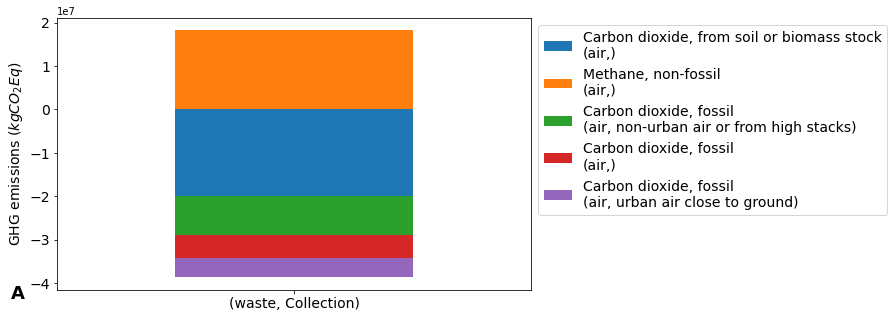

In [13]:
Data, plot = demo.contribution_analysis(functional_unit={('waste', 'Collection'):1},
                                              impact_method=('IPCC 2013', 'climate change', 'GWP 100a'),
                                              limit=0.1,
                                              limit_type='percent',
                                              target='emissions',
                                              figsize=(8.5,5),
                                              font_scale=1)
plot[0].text(0.05, 0.1, 'A', fontsize=18, weight='bold')
plot[1].set_title(None)
plot[1].set_ylabel(r"GHG emissions $(kgCO_2 Eq)$")
plot[0].savefig('Contribution_top_emissions',dpi=600, bbox_inches='tight')
Data.to_csv('Contribution_top_emissions_raw_data.csv')
Data

### Top activities contributing to the GWP of the Base Case

,Activity,Flow,Flow Unit,Contribution,Unit
0,Electricity production,1.656724e+07,kWh,-1.380814e+07,kg CO2-Eq
1,Equipment CNG,-1.341395e+06,m3,-5.094557e+06,kg CO2-Eq
2,LF Wood,3.283305e+03,Mg/year,-4.791381e+06,kg CO2-Eq
3,LF Textiles,4.775716e+03,Mg/year,4.350734e+06,kg CO2-Eq
4,Equipment Diesel,1.011838e+06,L,3.626906e+06,kg CO2-Eq
5,LF Food Waste Vegetable,8.805226e+03,Mg/year,3.498870e+06,kg CO2-Eq
6,LF Wood Other,1.940135e+03,Mg/year,-2.653192e+06,kg CO2-Eq
7,Reprocessing Fe,2.312103e+03,Mg/year,-2.555846e+06,kg CO2-Eq


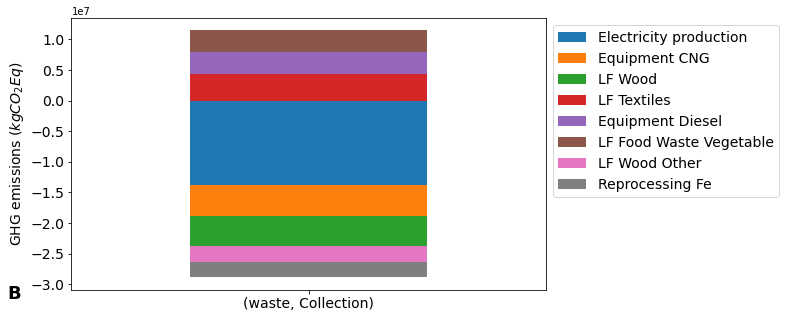

In [14]:
Data, plot = demo.contribution_analysis(functional_unit={('waste', 'Collection'):1},
                                          impact_method=('IPCC 2013', 'climate change', 'GWP 100a'),
                                          limit=0.1,
                                          limit_type='percent',
                                          target='activities',
                                          figsize=(8.5,5))
plot[0].text(0.02, 0.1, 'B', fontsize=18, weight='bold')
plot[1].set_title(None)
plot[1].set_ylabel(r"GHG emissions $(kgCO_2 Eq)$")
plot[0].savefig('Contribution_top_acts', dpi=600, bbox_inches='tight')
Data.to_csv('Contribution_top_acts_raw_data.csv')
Data

## Plot SWM Network

In [15]:
demo.parameters.SWM_network(show_vals=False, all_flow=False, filename='SWM_network_BaseCase')

<img src="SWM_network_BaseCase.gv.png" alt="Drawing" style="width: 600px; "  align="left"/>